# Part I - Prosper Loan Data Exploration
## by James Franchino

## Introduction
> This data set contains information on P2P (peer-to-peer) loans facilitated through Prosper Funding LLC.


## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import re
import requests

%matplotlib inline

In [2]:
url = 'https://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv'
data = requests.get(url)
with open (url.split('/')[-1], mode='wb') as file:
    file.write(data.content)

In [2]:
df = pd.read_csv('prosperLoanData.csv')
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [4]:
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [5]:
df.sample(10)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
98980,709F341740448869546527A,301857,2008-03-30 18:41:20.610000000,HR,36,Completed,2009-04-20 00:00:00,0.14982,0.1284,0.1184,...,-6.89,0.0,0.00,0.00,0.00,1.0,0,0,0.0,6
70935,08CC343276046973301DBF5,401855,2008-09-21 14:16:12.550000000,A,36,Chargedoff,2009-07-31 00:00:00,0.11384,0.0999,0.0899,...,-20.24,-767.4,4410.67,3186.29,1333.62,1.0,0,0,0.0,182
95586,23743599569795092C7EBE2,1073041,2014-01-01 07:30:49.520000000,NaN,36,Current,NaN,0.11563,0.0879,0.0779,...,-12.74,0.0,0.00,0.00,0.00,1.0,0,0,0.0,1
52677,9E4535962193844591E51D5,1031923,2013-12-06 19:34:00.117000000,NaN,36,Current,NaN,0.13799,0.1099,0.0999,...,-25.11,0.0,0.00,0.00,0.00,1.0,0,0,0.0,1
79942,6A4B3410912819685C17942,264706,2008-01-13 18:57:00.003000000,A,36,Completed,2011-01-22 00:00:00,0.11475,0.1008,0.0908,...,-97.04,0.0,0.00,0.00,0.00,1.0,0,0,0.0,211
50952,1F583428187776736D15723,376514,2008-08-01 13:22:44.700000000,B,36,Completed,2010-02-23 00:00:00,0.18958,0.1750,0.1650,...,-59.27,0.0,0.00,0.00,0.00,1.0,0,0,0.0,256
178,0F0F33770589739293D8AB0,76651,2006-12-20 10:19:22.643000000,HR,36,Completed,2007-05-23 00:00:00,0.24856,0.2400,0.2350,...,-4.23,0.0,0.00,0.00,0.00,1.0,0,0,0.0,19
57991,F2733599958540330A42010,1164500,2014-01-26 07:32:54.953000000,NaN,60,Current,NaN,0.28129,0.2554,0.2454,...,-3.29,0.0,0.00,0.00,0.00,1.0,0,0,0.0,2
41389,9E5A35989855271176EEC54,1127019,2014-01-08 13:26:12.187000000,NaN,36,Current,NaN,0.12081,0.0930,0.0830,...,-4.25,0.0,0.00,0.00,0.00,1.0,0,0,0.0,1
42971,8D923596518178579D64982,1062896,2013-12-09 15:54:51.577000000,NaN,36,Current,NaN,0.14714,0.1189,0.1089,...,-16.79,0.0,0.00,0.00,0.00,1.0,0,0,0.0,1


In [6]:
df.shape

(113937, 81)

This Dataset includes 81 columns. For the purpose of this analysis I am going to focus on a handful of the most useful columns. I will determine which columns to use by looking at the Variable Definitions found here https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0

In [7]:
columns_keep =  [
    'Term', 'LoanStatus', 'BorrowerRate', 'ProsperRating (Alpha)', 'ListingCategory (numeric)', 'EmploymentStatus',
    'DelinquenciesLast7Years', 'StatedMonthlyIncome', 'TotalProsperLoans', 'LoanOriginalAmount',
    'LoanOriginationDate', 'Recommendations', 'Investors'
]

In [8]:
new_df = df[columns_keep]

In [9]:
new_df.shape

(113937, 13)

In [10]:
new_df.head()

,Term,LoanStatus,BorrowerRate,ProsperRating (Alpha),ListingCategory (numeric),EmploymentStatus,DelinquenciesLast7Years,StatedMonthlyIncome,TotalProsperLoans,LoanOriginalAmount,LoanOriginationDate,Recommendations,Investors
0,36,Completed,0.1580,NaN,0,Self-employed,4.0,3083.333333,NaN,9425,2007-09-12 00:00:00,0,258
1,36,Current,0.0920,A,2,Employed,0.0,6125.000000,NaN,10000,2014-03-03 00:00:00,0,1
2,36,Completed,0.2750,NaN,0,Not available,0.0,2083.333333,NaN,3001,2007-01-17 00:00:00,0,41
3,36,Current,0.0974,A,16,Employed,14.0,2875.000000,NaN,10000,2012-11-01 00:00:00,0,158
4,36,Current,0.2085,D,2,Employed,0.0,9583.333333,1.0,15000,2013-09-20 00:00:00,0,20


In [11]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 13 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Term                       113937 non-null  int64  
 1   LoanStatus                 113937 non-null  object 
 2   BorrowerRate               113937 non-null  float64
 3   ProsperRating (Alpha)      84853 non-null   object 
 4   ListingCategory (numeric)  113937 non-null  int64  
 5   EmploymentStatus           111682 non-null  object 
 6   DelinquenciesLast7Years    112947 non-null  float64
 7   StatedMonthlyIncome        113937 non-null  float64
 8   TotalProsperLoans          22085 non-null   float64
 9   LoanOriginalAmount         113937 non-null  int64  
 10  LoanOriginationDate        113937 non-null  object 
 11  Recommendations            113937 non-null  int64  
 12  Investors                  113937 non-null  int64  
dtypes: float64(4), int64(5), obje

In [12]:
new_df.describe()

,Term,BorrowerRate,ListingCategory (numeric),DelinquenciesLast7Years,StatedMonthlyIncome,TotalProsperLoans,LoanOriginalAmount,Recommendations,Investors
count,113937.000000,113937.000000,113937.000000,112947.000000,1.139370e+05,22085.000000,113937.00000,113937.000000,113937.000000
mean,40.830248,0.192764,2.774209,4.154984,5.608026e+03,1.421100,8337.01385,0.048027,80.475228
std,10.436212,0.074818,3.996797,10.160216,7.478497e+03,0.764042,6245.80058,0.332353,103.239020
min,12.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1000.00000,0.000000,1.000000
25%,36.000000,0.134000,1.000000,0.000000,3.200333e+03,1.000000,4000.00000,0.000000,2.000000
50%,36.000000,0.184000,1.000000,0.000000,4.666667e+03,1.000000,6500.00000,0.000000,44.000000
75%,36.000000,0.250000,3.000000,3.000000,6.825000e+03,2.000000,12000.00000,0.000000,115.000000
max,60.000000,0.497500,20.000000,99.000000,1.750003e+06,8.000000,35000.00000,39.000000,1189.000000


 ProsperRating (Alpha) uses Prosper's own proprietary rating system which was initiated in July 2009. With so many null values these null values should be dropped

In [13]:
new_df = new_df.dropna(subset=['ProsperRating (Alpha)']).reset_index()

I will convert 'LoanOriginationDate' to a datetime format 

In [14]:
new_df['LoanOriginationDate'] = pd.to_datetime(new_df['LoanOriginationDate'])

In [15]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84853 entries, 0 to 84852
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   index                      84853 non-null  int64         
 1   Term                       84853 non-null  int64         
 2   LoanStatus                 84853 non-null  object        
 3   BorrowerRate               84853 non-null  float64       
 4   ProsperRating (Alpha)      84853 non-null  object        
 5   ListingCategory (numeric)  84853 non-null  int64         
 6   EmploymentStatus           84853 non-null  object        
 7   DelinquenciesLast7Years    84853 non-null  float64       
 8   StatedMonthlyIncome        84853 non-null  float64       
 9   TotalProsperLoans          19797 non-null  float64       
 10  LoanOriginalAmount         84853 non-null  int64         
 11  LoanOriginationDate        84853 non-null  datetime64[ns]
 12  Reco

'TotalProsperLoans' has many null values, I will replace them with '0' to fill out our data

In [16]:
new_df['TotalProsperLoans'] = new_df['TotalProsperLoans'].fillna(0)

In [17]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84853 entries, 0 to 84852
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   index                      84853 non-null  int64         
 1   Term                       84853 non-null  int64         
 2   LoanStatus                 84853 non-null  object        
 3   BorrowerRate               84853 non-null  float64       
 4   ProsperRating (Alpha)      84853 non-null  object        
 5   ListingCategory (numeric)  84853 non-null  int64         
 6   EmploymentStatus           84853 non-null  object        
 7   DelinquenciesLast7Years    84853 non-null  float64       
 8   StatedMonthlyIncome        84853 non-null  float64       
 9   TotalProsperLoans          84853 non-null  float64       
 10  LoanOriginalAmount         84853 non-null  int64         
 11  LoanOriginationDate        84853 non-null  datetime64[ns]
 12  Reco

### What is the structure of your dataset?

> We have 13 columns with 84,853 rows of data about peer-to-peer loans made through Prosper.

### What is/are the main feature(s) of interest in your dataset?

> What metrics can be used to predict credit defaults? What metrics go into Prosper's proprietary rating system?
> Does the loan term have an effect on default?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Prosper rating, loan amount, loan term.

## Univariate Exploration

### Loan Status

In [18]:
# setting color and style
base_color = sb.color_palette()[0];
sb.set_style('darkgrid');

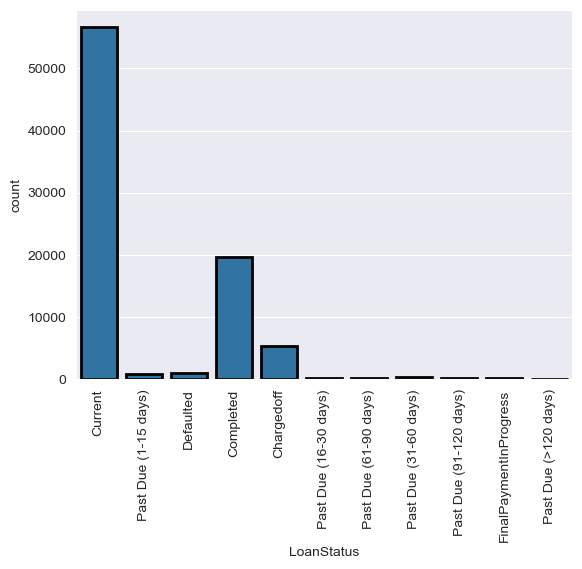

In [19]:
# 1st plot
sb.countplot(data = new_df, x = 'LoanStatus', color = base_color, edgecolor='black', linewidth=2);
plt.xticks(rotation=90);

Observation 1:

> Most of the loans are current, not late or in default.

> Completed loans are our second biggest category.

> Past due loans are split into several categories based on the amount of days past due.

### Employment status

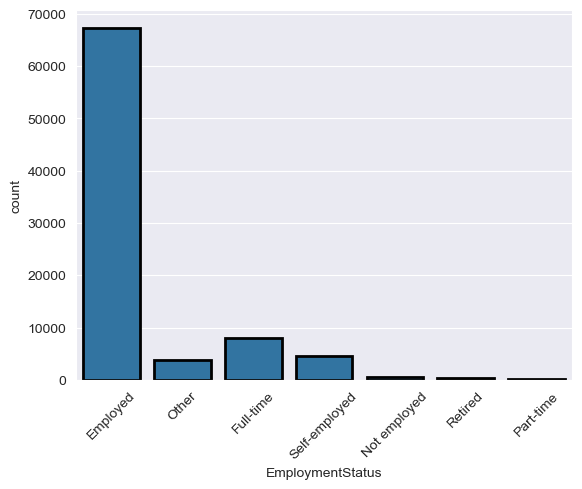

In [20]:
# 2nd plot

sb.countplot(data = new_df, x = 'EmploymentStatus', color = base_color, edgecolor='black', linewidth=2);
plt.xticks(rotation = 45);

Observation 2:

> Of the 84853 records, the vast majority (~ 68,000 or 97%) are listed as employed.

> Full-Time makes up the second largest group. There is no information available on the difference between Employed and Full-Time

### Monthly Income

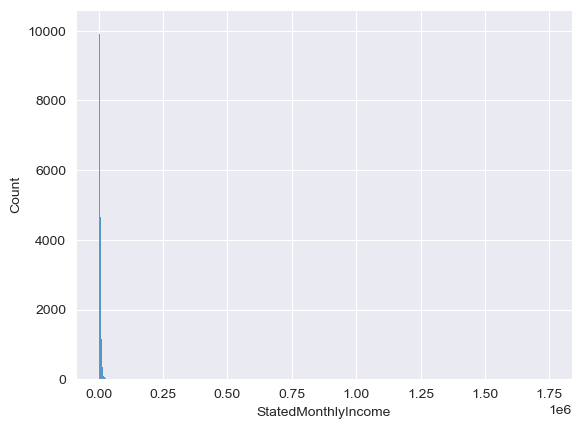

In [21]:
# 3rd plot

sb.histplot(data = new_df, x='StatedMonthlyIncome', bins=2500);

This histogram is heavily right skewed with many outliers, and I will need to drill down to get more information.


In [22]:
income_standard = new_df['StatedMonthlyIncome'].std()
income_mean = new_df['StatedMonthlyIncome'].mean()
boundary = income_mean + income_standard * 3
len(new_df[new_df['StatedMonthlyIncome'] >= boundary])

245

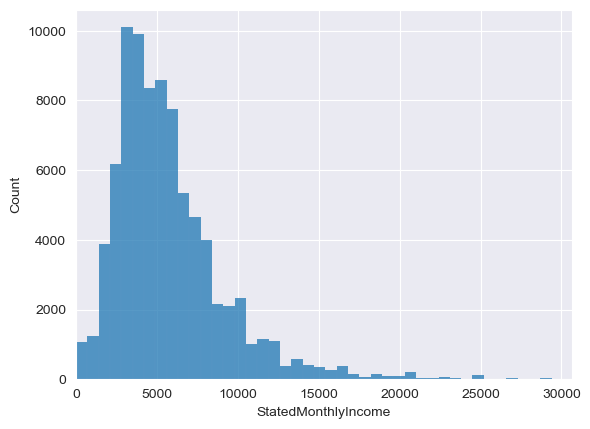

In [23]:
# 4th plot

sb.histplot(data=new_df, x='StatedMonthlyIncome', bins = 2500);
plt.xlim(0, boundary);

Observation 3:

> We still have a right skewed graph even after drilling down but we can see that the majority of lendees land around $5000 in monthly income.

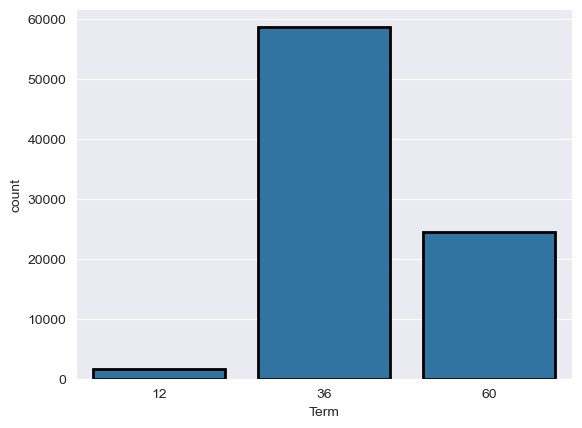

In [24]:
# 5th plot

sb.countplot(data = new_df, x = 'Term', color = base_color, edgecolor='black', linewidth=2);

Observation 4:

> The majority of loans made are 3 year (36 month) terms.

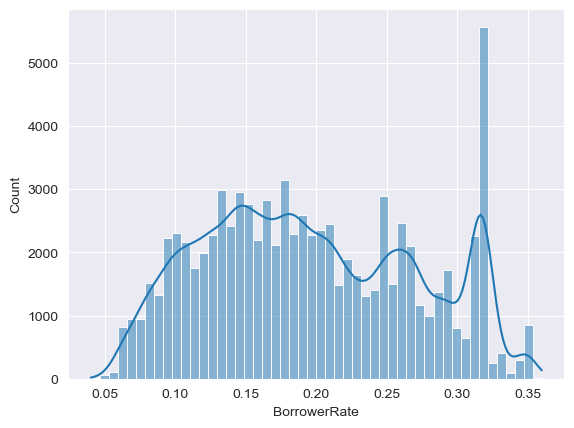

In [25]:
# 6th plot

sb.histplot(data=new_df, x='BorrowerRate', bins = 50, kde=True);

In [26]:
new_df['BorrowerRate'].value_counts()

0.3177    3672
0.3199    1645
0.2699    1314
0.1099     932
0.3500     802
          ... 
0.3094       1
0.1525       1
0.2125       1
0.2784       1
0.2665       1
Name: BorrowerRate, Length: 1229, dtype: int64

Observation 5:

> Here we have a left skewed plot. We see a more uniform distribution of rates until we get to 0.3177. We should plot this against terms to see if there is a correlation

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Both monthly income and borrower rate are heavily skewed with outliers.  

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Both monthly income and borrower rate are heavily skewed with outliers.

## Bivariate Exploration

In [27]:
# Transforming the 'LoanStatus' Column

transform = (new_df['LoanStatus'] == 'Completed') | (new_df['LoanStatus'] == 'Chargedoff')
new_df = new_df[transform]

def defaulted(row):
    if row['LoanStatus'] == 'Chargedoff':
        return 'Defaulted'
    else:
        return row['LoanStatus']
    
new_df.loc[new_df.LoanStatus == new_df.apply(defaulted, axis=1)]
new_df['LoanStatus'].value_counts()

Completed     19664
Chargedoff     5336
Name: LoanStatus, dtype: int64

19664 completed loans and 6341 defaulted loans

In [28]:
# Reducing the number of categories

categories = {1: 'Debt Consolidation', 2: 'Home Improvement', 3: 'Business', 6: 'Auto', 7: 'Other'}
def reduce_categories(row):
    loan_category = row['ListingCategory (numeric)']
    if  loan_category in categories:
        return categories[loan_category]
    else:
        return categories[7]
    
new_df['ListingCategory (numeric)'] = new_df.apply(reduce_categories, axis=1)
new_df['ListingCategory (numeric)'].value_counts()

Debt Consolidation    12212
Other                  6839
Home Improvement       2524
Business               2258
Auto                   1167
Name: ListingCategory (numeric), dtype: int64

### Status and Prosper Rating:

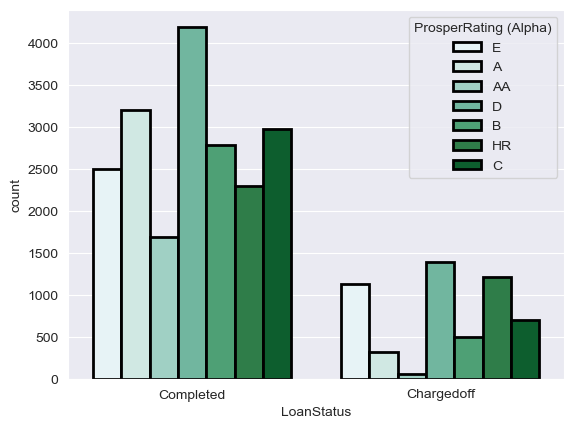

In [29]:
# 7th plot

sb.countplot(data = new_df, x = 'LoanStatus', hue = 'ProsperRating (Alpha)', palette = 'BuGn', edgecolor='black', linewidth=2);

Observation 6:

> The most frequent rating among defaulted loans is rating D.


> The most frequent rating among completed loans is also D and second highest is A. This may explain why so many with a D rating were able to get loans.

### Prosper rating vs loan length 

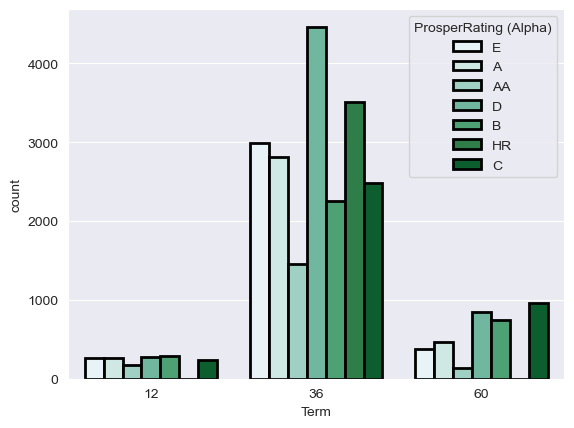

In [30]:
# 8th plot

sb.countplot(data = new_df, x = 'Term', hue = 'ProsperRating (Alpha)', palette = 'BuGn', edgecolor='black', linewidth=2);

Observation 7:

> The amount of 12 month term loans is nearly uniform with the exception of the HR category

> 36 month term loans have the highest amount of loans in the HR category

### Loan status vs loan term

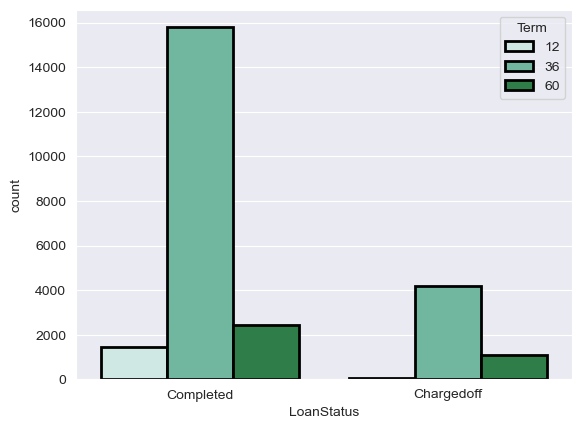

In [31]:
# 9th plot

sb.countplot(data = new_df, x = 'LoanStatus', hue = 'Term', palette = 'BuGn', edgecolor='black', linewidth=2);

Observation 8:

> In both Completed and Charged Off loans, the most common term is 36 months.

### Loan status vs Loan reason (category)

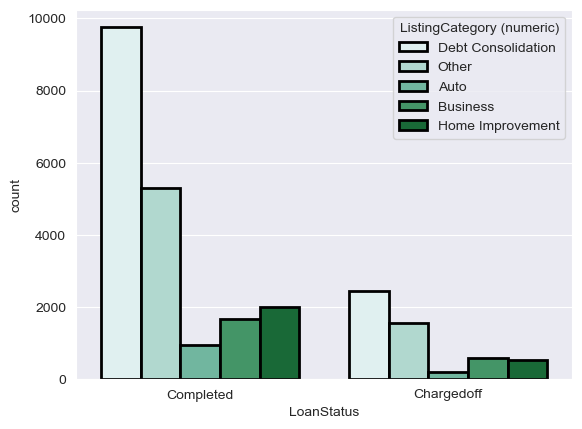

In [32]:
# 10th plot

sb.countplot(data = new_df, x = 'LoanStatus', hue = 'ListingCategory (numeric)', palette = 'BuGn', edgecolor='black', linewidth=2);

observation 9:

> In both completed and charged off loans, 'other' was the most frequent category

### Loan status vs loan amount

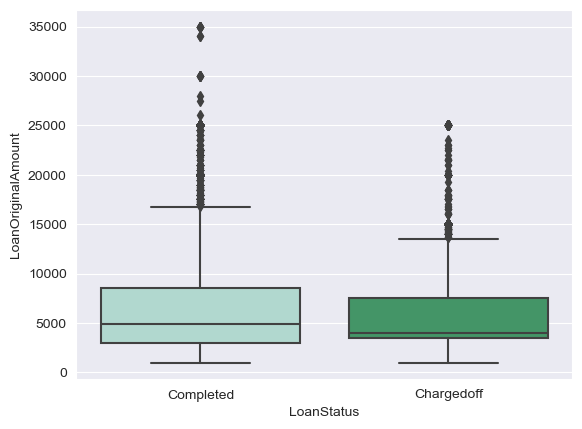

In [33]:
# 11th plot

sb.boxplot(data = new_df, x = 'LoanStatus', y = 'LoanOriginalAmount', palette = 'BuGn');

observation 9:

> Charged off loans tend to be smaller than completed loans

### Employment status by credit rating

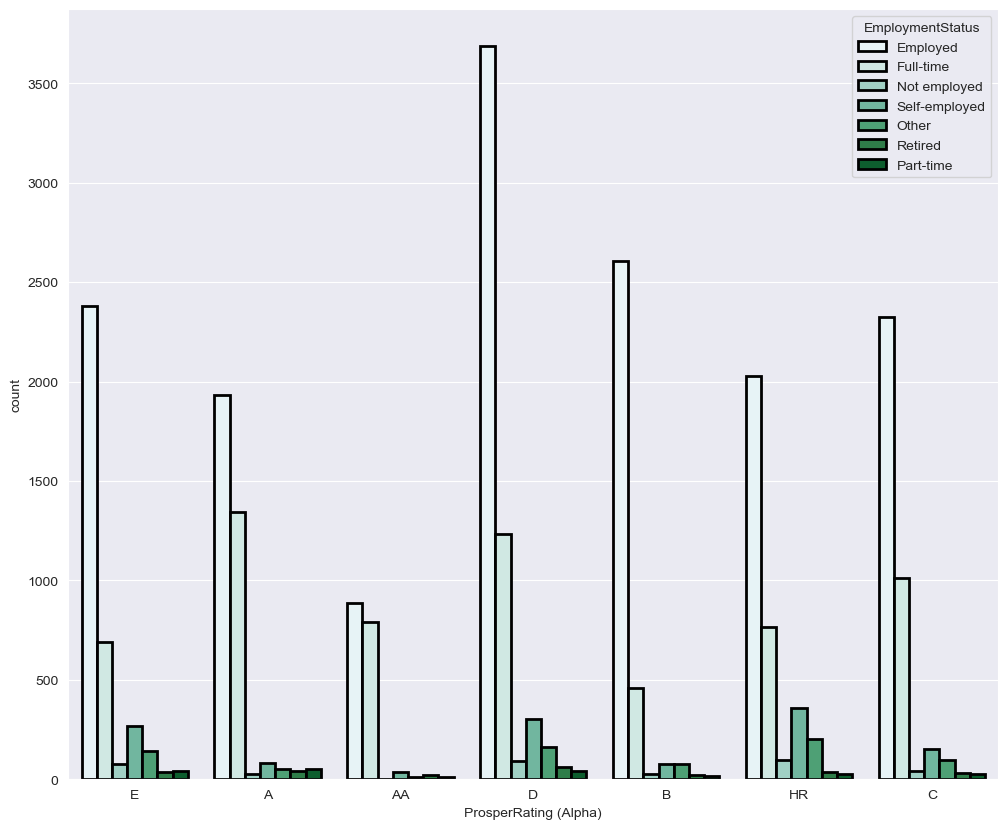

In [34]:
# 12th plot

plt.figure(figsize = [12, 10])
sb.countplot(data = new_df, x = 'ProsperRating (Alpha)', hue = 'EmploymentStatus', palette = 'BuGn', edgecolor='black', linewidth=2);

observation 10:

> Not Employed, Self-employed, Retired and Part-Time are more common among the lower prosper ratings

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> In Loan status vs Loan amount defaulted loans tend to be smaller than completed loans. 
Employment status of individuals with lower ratings tends to be 'Not employed', 'Self-employed', 'Retired' or 'Part-time'. The higher the rating the more likely the borrower is to be employed.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Interestingly, the Prosper rating 'D' is the most frequent rating among both defaulted and completed loans.

## Multivariate Exploration

### Rating, loan amount, loan status

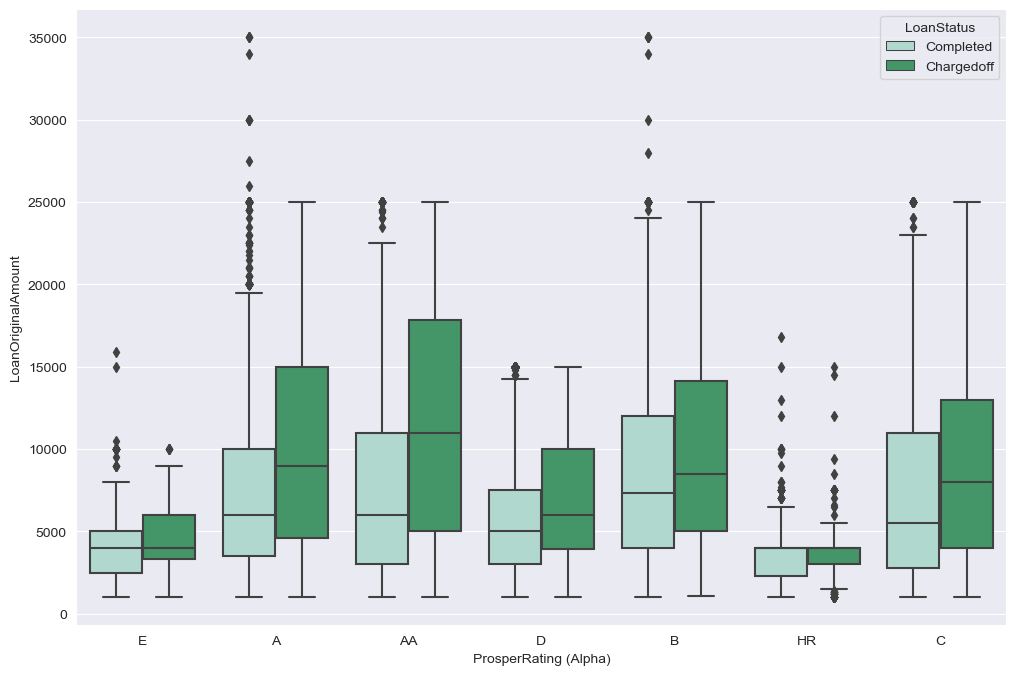

In [35]:
# 13th plot

plt.figure(figsize = [12, 8])
sb.boxplot(data = new_df, x = 'ProsperRating (Alpha)', y = 'LoanOriginalAmount', hue = 'LoanStatus', palette = 'BuGn');

Observation 11:

> Except for the HR rating, defaulted loans are larger than completed loans.


> Most of the defaulted loans come from individuals with a low Prosper rating.

### Loan category, credit rating, and loan outcomes.

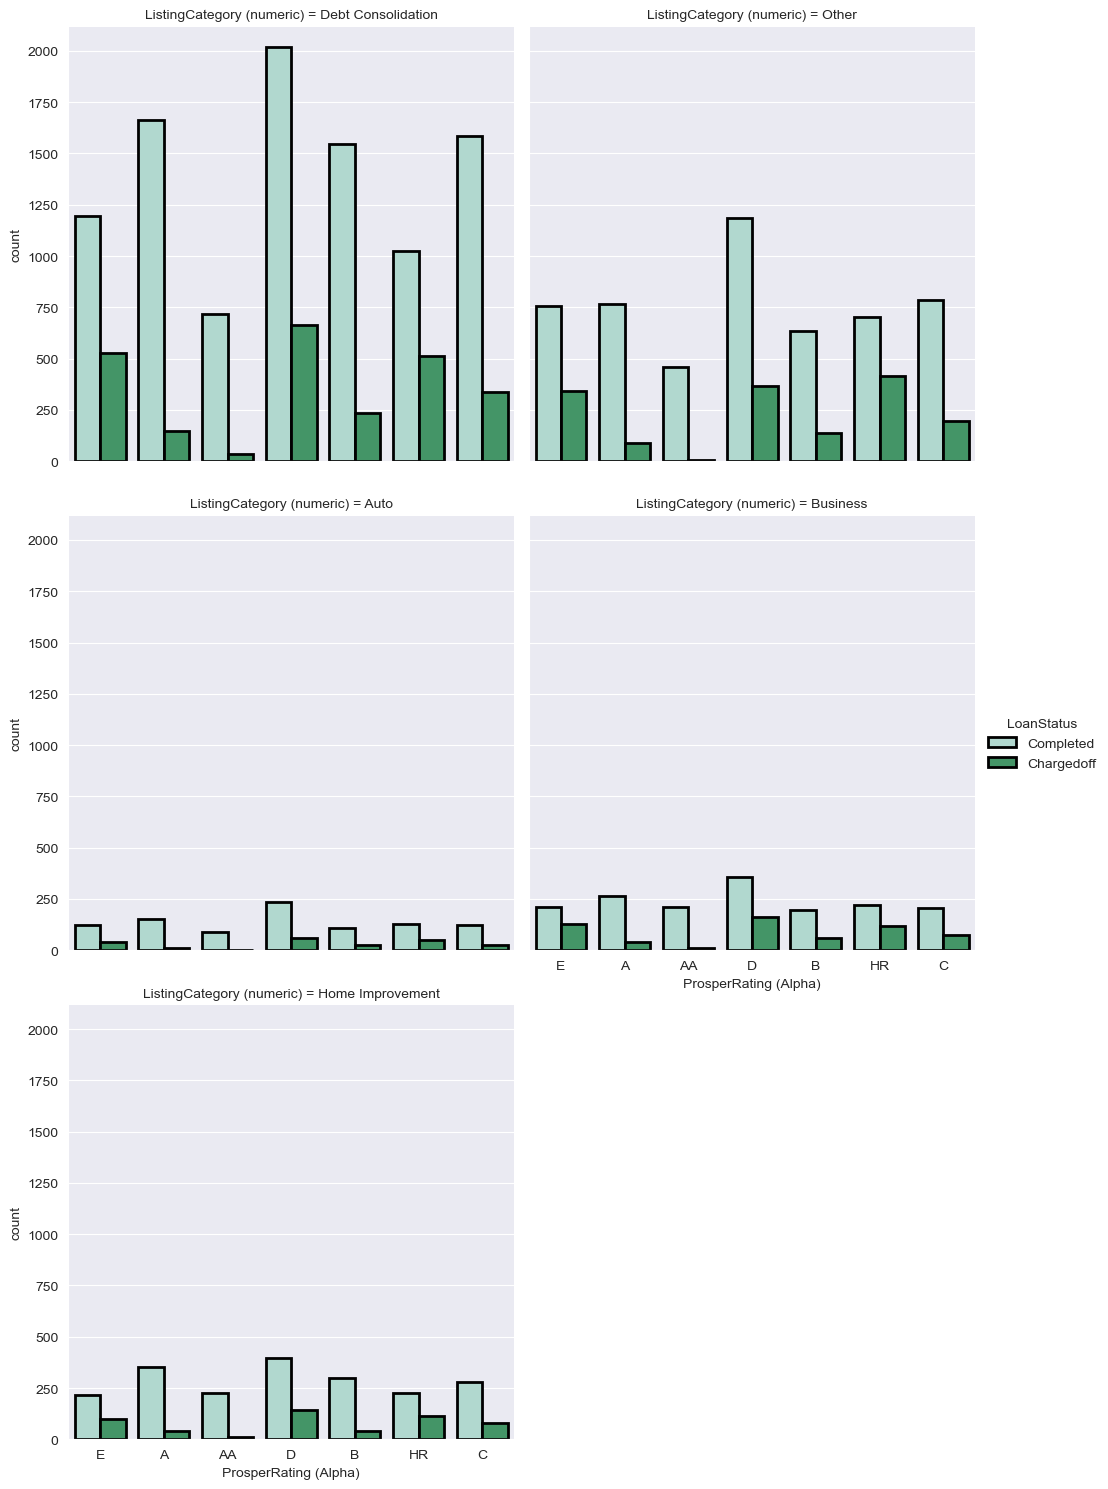

In [36]:
# 14th plot

sb.catplot(x = 'ProsperRating (Alpha)', hue = 'LoanStatus', col = 'ListingCategory (numeric)',
              data = new_df, kind = 'count', palette = 'BuGn', col_wrap = 2, edgecolor='black', linewidth=2);

Observation 12:

> Debt consolidation loans make up the largest category of loans, and have the largest disparity between Completed and Charged Off loans. 

### Loan amount, loan category, and loan status 

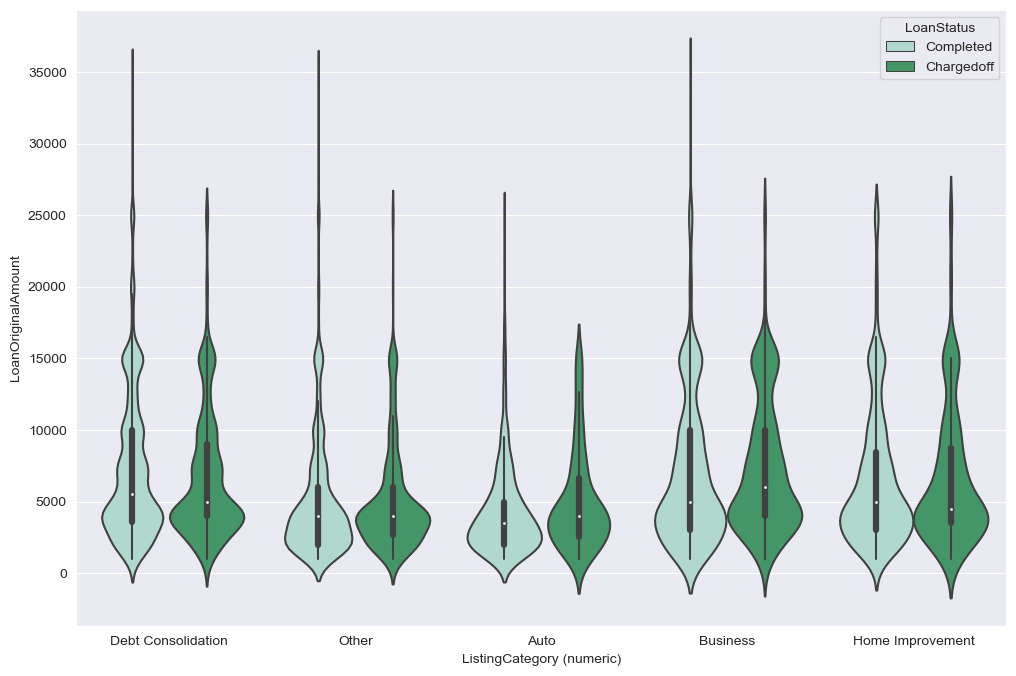

In [37]:
# 15th plot

plt.figure(figsize = [12, 8])
sb.violinplot(data = new_df, x = 'ListingCategory (numeric)', y = 'LoanOriginalAmount', hue = 'LoanStatus', palette = 'BuGn');

Observation 13:

> With the exception of the Home Improvement category, the loan amount of charged off loans is smaller than the completed loans. 


> The top dollar amount of loans in both the Debt Consolidation and business categories are very close

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Our initial assumptions were strengthened. Most of the defaulted credits comes from individuals with low Prosper rating and Business category tend to have larger amount.

### Were there any interesting or surprising interactions between features?

> I found it interesting that in the 36 month loan term category lenders seemed the most willing to loan to those with a poor Prosper credit rating 

## Conclusions
> This data set was fairly clean with only a little cleaning and transformation needed. Prosper's 2 biggest loan categories are Business and debt consolidation. Their most popular loan term is 36 months and lenders seem to be far more willing to make loans to people with lower credit ratings. 
